In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Activation,  Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D,MaxPool2D,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
%matplotlib inline
import matplotlib.pyplot as plt
from skimage.feature import greycomatrix, greycoprops
from skimage import io
import cv2
import numpy as np
from PIL import Image, ImageFilter
import numpy as np
import pytesseract as tess
import random

In [2]:
physical_devices=tf.config.experimental.list_physical_devices('GPU')
print(len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0],True)

1


In [3]:
os.chdir(r"C:\Users\tejas\Data\CNN_COV")
if os.path.isdir('train/MI') is False:
    os.makedirs('train/MI')
    os.makedirs('train/N')
    os.makedirs('train/HB')
    os.makedirs('valid/MI')
    os.makedirs('valid/N')
    os.makedirs('Valid/HB')
    os.makedirs('test/MI')
    os.makedirs('test/N')
    os.makedirs('test/HB')

    for c in random.sample(glob.glob('MI*'),150):
        shutil.move(c,'train/MI')
    for c in random.sample(glob.glob('Normal*'),150):
        shutil.move(c,'train/N')
    for c in random.sample(glob.glob('HB*'),150):
        shutil.move(c,'train/HB')
    for c in random.sample(glob.glob('MI*'),120):
        shutil.move(c,'valid/MI')
    for c in random.sample(glob.glob('Normal*'),140):
        shutil.move(c,'valid/N')
    for c in random.sample(glob.glob('HB*'),140):
        shutil.move(c,'valid/HB')
    for c in random.sample(glob.glob('MI*'),6):
        shutil.move(c,'test/MI')
    for c in random.sample(glob.glob('Normal*'),10):
        shutil.move(c,'test/N')
    for c in random.sample(glob.glob('HB*'),10):
        shutil.move(c,'test/HB')
           
os.chdir('../../')

In [4]:
train_path= 'data/CNN_COV/train/*'
valid_path= 'data/CNN_COV/valid/*'
test_path= 'data/CNN_COV/test/*'

In [5]:
train_images=[]
train_labels=[]
train_hr=[]
train_imagepath=[]
for directory_path in glob.glob(train_path):
    label=directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path,"*.jpg")):
        train_imagepath.append(img_path)
        image1 = cv2.imread(img_path)
        rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
        hr=rgb[1530:1560,550:608]
        try:
            text=tess.image_to_string(hr, lang='eng',
                        config='--psm 13 --oem 3 -c tessedit_char_whitelist=0123456789')
            heart_rate=int(text)
            if heart_rate>220:
                hr=rgb[1530:1560,650:715]
                try:
                    text=tess.image_to_string(hr, lang='eng',
                                              config='--psm 13 --oem 3 -c tessedit_char_whitelist=0123456789')
                    heart_rate=int(text)
                    if(heart_rate<10):
                        train_hr.append(heart_rate*10)
                    else:
                        train_hr.append(heart_rate)
                except:
                    train_hr.append(0)
            elif(heart_rate<10):
                train_hr.append((heart_rate)*10)
            else:
                train_hr.append(heart_rate)
        except:
            train_hr.append(0)
        img = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY) 
        ret, thresh1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY + 
                                            cv2.THRESH_OTSU)   
        I=thresh1
        im=I[275:1520, 75:2135]
        cnn = cv2.resize(im, (224, 224))
        #cv2.imwrite(img_path, im)
        train_images.append(cnn)
        train_labels.append(label)
train_images=np.array(train_images)
train_labels=np.array(train_labels)

In [6]:
shuffle = list(zip(train_images,train_labels,train_hr,train_imagepath))
random.shuffle(shuffle)
tr_img, tr_lab,tr_hr,tr_ip = zip(*shuffle)
train_images, train_labels,train_hr,train_imagepath = list(tr_img), list(tr_lab),list(tr_hr),list(tr_ip)
train_images=np.array(train_images)
train_labels=np.array(train_labels)

In [7]:
for i in range(len(train_hr)):
    print(train_hr[i],train_imagepath[i],train_labels[i])

86 data/CNN_COV/train\HB\HB(150).jpg HB
71 data/CNN_COV/train\N\Normal(276).jpg N
100 data/CNN_COV/train\HB\HB(126).jpg HB
70 data/CNN_COV/train\N\Normal(209).jpg N
86 data/CNN_COV/train\N\Normal(216).jpg N
51 data/CNN_COV/train\MI\MI(125).jpg MI
51 data/CNN_COV/train\MI\MI(185).jpg MI
108 data/CNN_COV/train\HB\HB(21).jpg HB
102 data/CNN_COV/train\HB\HB(151).jpg HB
75 data/CNN_COV/train\MI\MI(194).jpg MI
107 data/CNN_COV/train\HB\HB(167).jpg HB
78 data/CNN_COV/train\N\Normal(95).jpg N
85 data/CNN_COV/train\MI\MI(172).jpg MI
59 data/CNN_COV/train\N\Normal(148).jpg N
81 data/CNN_COV/train\MI\MI(158).jpg MI
80 data/CNN_COV/train\N\Normal(124).jpg N
74 data/CNN_COV/train\N\Normal(161).jpg N
87 data/CNN_COV/train\HB\HB(4).jpg HB
90 data/CNN_COV/train\MI\MI(9).jpg MI
110 data/CNN_COV/train\HB\HB(86).jpg HB
135 data/CNN_COV/train\MI\MI (31).jpg MI
115 data/CNN_COV/train\N\Normal(293).jpg N
105 data/CNN_COV/train\HB\HB(78).jpg HB
74 data/CNN_COV/train\MI\MI(30).jpg MI
74 data/CNN_COV/train\N\N

In [8]:
valid_images=[]
valid_labels=[]
valid_hr=[]
valid_imagepath=[]
for directory_path in glob.glob(valid_path):
    label=directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path,"*.jpg")):
        valid_imagepath.append(img_path)
        image1 = cv2.imread(img_path)
        rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
        hr=rgb[1530:1560,550:608]
        try:
            text=tess.image_to_string(hr, lang='eng',
                        config='--psm 13 --oem 3 -c tessedit_char_whitelist=0123456789')
            heart_rate=int(text)
            if heart_rate>220:
                hr=rgb[1530:1560,650:715]
                try:
                    text=tess.image_to_string(hr, lang='eng',
                                              config='--psm 13 --oem 3 -c tessedit_char_whitelist=0123456789')
                    heart_rate=int(text)
                    if(heart_rate<10):
                        valid_hr.append(heart_rate*10)
                    else:
                        valid_hr.append(heart_rate)
                except:
                    valid_hr.append(0)
            elif(heart_rate<10):
                valid_hr.append((heart_rate)*10)
            else:
                valid_hr.append(heart_rate)
        except:
            valid_hr.append(0)
        img = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY) 
        ret, thresh1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY + 
                                            cv2.THRESH_OTSU)   
        I=thresh1
        im=I[275:1520, 75:2135]
        cnn = cv2.resize(im, (224, 224))
        #cv2.imwrite(img_path, im)
        valid_images.append(cnn)
        valid_labels.append(label)
valid_images=np.array(valid_images)
valid_labels=np.array(valid_labels)

In [9]:
shuffle = list(zip(valid_images,valid_labels,valid_hr,valid_imagepath))
random.shuffle(shuffle)
vl_img, vl_lab,vl_hr,vl_ip = zip(*shuffle)
valid_images,valid_labels,valid_hr,valid_imagepath = list(vl_img), list(vl_lab),list(vl_hr),list(vl_ip)
valid_images=np.array(valid_images)
valid_labels=np.array(valid_labels)

In [10]:
for i in range(len(valid_hr)):
    print(valid_hr[i],valid_imagepath[i])

100 data/CNN_COV/valid\HB\HB(113).jpg
64 data/CNN_COV/valid\N\Normal(76).jpg
110 data/CNN_COV/valid\HB\HB(30).jpg
80 data/CNN_COV/valid\N\Normal(154).jpg
86 data/CNN_COV/valid\HB\HB(184).jpg
60 data/CNN_COV/valid\N\Normal(269).jpg
58 data/CNN_COV/valid\MI\MI(203).jpg
53 data/CNN_COV/valid\MI\MI(86).jpg
98 data/CNN_COV/valid\HB\HB(196).jpg
116 data/CNN_COV/valid\MI\MI(167).jpg
82 data/CNN_COV/valid\N\Normal(163).jpg
75 data/CNN_COV/valid\N\Normal(282).jpg
108 data/CNN_COV/valid\HB\HB(15).jpg
78 data/CNN_COV/valid\N\Normal(168).jpg
96 data/CNN_COV/valid\HB\HB(20).jpg
105 data/CNN_COV/valid\HB\HB   (42).jpg
73 data/CNN_COV/valid\MI\MI(222).jpg
74 data/CNN_COV/valid\MI\MI(150).jpg
192 data/CNN_COV/valid\HB\HB(180).jpg
74 data/CNN_COV/valid\N\Normal(284).jpg
81 data/CNN_COV/valid\MI\MI (8).jpg
75 data/CNN_COV/valid\N\Normal(166).jpg
81 data/CNN_COV/valid\N\Normal(66).jpg
81 data/CNN_COV/valid\MI\MI(128).jpg
102 data/CNN_COV/valid\HB\HB   (49).jpg
78 data/CNN_COV/valid\N\Normal(63).jpg
70 da

In [11]:
test_images=[]
test_labels=[]
test_hr=[]
test_imagepath=[]
for directory_path in glob.glob(test_path):
    label=directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path,"*.jpg")):
        test_imagepath.append(img_path)
        image1 = cv2.imread(img_path)
        rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
        hr=rgb[1530:1560,550:608]
        try:
            text=tess.image_to_string(hr, lang='eng',
                        config='--psm 13 --oem 3 -c tessedit_char_whitelist=0123456789')
            heart_rate=int(text)
            if heart_rate>220:
                hr=rgb[1530:1560,650:715]
                try:
                    text=tess.image_to_string(hr, lang='eng',
                                              config='--psm 13 --oem 3 -c tessedit_char_whitelist=0123456789')
                    heart_rate=int(text)
                    if(heart_rate<10):
                        test_hr.append(heart_rate*10)
                    else:
                        test_hr.append(heart_rate)
                except:
                    test_hr.append(0)
            elif(heart_rate<10):
                test_hr.append((heart_rate)*10)
            else:
                test_hr.append(heart_rate)
        except:
            test_hr.append(0)
        img = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY) 
        ret, thresh1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY + 
                                            cv2.THRESH_OTSU)   
        I=thresh1
        im=I[275:1520, 75:2135]
        cnn = cv2.resize(im, (224, 224))
        #cv2.imwrite(img_path, im)
        test_images.append(cnn)
        test_labels.append(label)
test_images=np.array(test_images)
test_labels=np.array(test_labels)

In [12]:
for i in range(len(test_hr)):
    print(test_hr[i],test_imagepath[i])

108 data/CNN_COV/test\HB\HB   (34).jpg
10 data/CNN_COV/test\HB\HB   (51).jpg
97 data/CNN_COV/test\HB\HB   (61).jpg
98 data/CNN_COV/test\HB\HB(162).jpg
112 data/CNN_COV/test\HB\HB(18).jpg
127 data/CNN_COV/test\HB\HB(187).jpg
93 data/CNN_COV/test\HB\HB(26).jpg
111 data/CNN_COV/test\HB\HB(34).jpg
118 data/CNN_COV/test\HB\HB(49).jpg
112 data/CNN_COV/test\HB\HB(88).jpg
53 data/CNN_COV/test\MI\MI (2).jpg
85 data/CNN_COV/test\MI\MI (35).jpg
70 data/CNN_COV/test\MI\MI (6).jpg
75 data/CNN_COV/test\MI\MI(103).jpg
66 data/CNN_COV/test\MI\MI(198).jpg
57 data/CNN_COV/test\MI\MI(41).jpg
58 data/CNN_COV/test\N\Normal(103).jpg
75 data/CNN_COV/test\N\Normal(121).jpg
70 data/CNN_COV/test\N\Normal(128).jpg
73 data/CNN_COV/test\N\Normal(15).jpg
74 data/CNN_COV/test\N\Normal(16).jpg
64 data/CNN_COV/test\N\Normal(181).jpg
58 data/CNN_COV/test\N\Normal(245).jpg
102 data/CNN_COV/test\N\Normal(291).jpg
71 data/CNN_COV/test\N\Normal(86).jpg
87 data/CNN_COV/test\N\Normal(94).jpg


In [13]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(valid_labels)
valid_labels_encoded = le.transform(valid_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [14]:
x_train, y_train, x_valid, y_valid,x_test, y_test = train_images, train_labels_encoded, valid_images, valid_labels_encoded,test_images,train_labels_encoded

In [15]:
x_train, x_valid,x_test = x_train / 255.0, x_valid / 255.0, x_test / 255.0

In [16]:
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_valid_one_hot = to_categorical(y_valid)

In [26]:
feature_extractor = Sequential()
feature_extractor.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same',input_shape=(224,224,1)))
feature_extractor.add(MaxPool2D(pool_size=(2,2),strides=2))

feature_extractor.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))
feature_extractor.add(MaxPool2D(pool_size=(2,2),strides=2))
feature_extractor.add(Dropout(0.4))

feature_extractor.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'))
feature_extractor.add(MaxPool2D(pool_size=(2,2),strides=2))
feature_extractor.add(Dropout(0.4))

feature_extractor.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'))
feature_extractor.add(MaxPool2D(pool_size=(2,2),strides=2))
Dropout(0.6),
feature_extractor.add(Flatten())

In [28]:
x = feature_extractor.output  
x = Dropout(0.6)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.6)(x)
prediction_layer = Dense(units=3, kernel_regularizer= keras.regularizers.l2(0.002), activation='softmax')(x)

In [29]:
cnn_model = Model(inputs=feature_extractor.input, outputs=prediction_layer)
cnn_model.compile(optimizer=Adam(learning_rate=0.0002), loss='categorical_crossentropy',metrics=['accuracy'])
print(cnn_model.summary()) 

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9_input (InputLayer)  [(None, 224, 224, 1)]    0         
                                                                 
 conv2d_9 (Conv2D)           (None, 224, 224, 32)      320       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 56, 56, 64)        0     

In [30]:
history = cnn_model.fit(x_train, y_train_one_hot, epochs=50, validation_data = (x_valid, y_valid_one_hot))

Epoch 1/50
15/15 [==============================] - 2s 76ms/step - loss: 1.3500 - accuracy: 0.3244 - val_loss: 1.1113 - val_accuracy: 0.3000
Epoch 2/50
15/15 [==============================] - 1s 55ms/step - loss: 1.1258 - accuracy: 0.3533 - val_loss: 1.1104 - val_accuracy: 0.3000
Epoch 3/50
15/15 [==============================] - 1s 55ms/step - loss: 1.1207 - accuracy: 0.3356 - val_loss: 1.1101 - val_accuracy: 0.3550
Epoch 4/50
15/15 [==============================] - 1s 56ms/step - loss: 1.1197 - accuracy: 0.3044 - val_loss: 1.1103 - val_accuracy: 0.3000
Epoch 5/50
15/15 [==============================] - 1s 55ms/step - loss: 1.1142 - accuracy: 0.3289 - val_loss: 1.1100 - val_accuracy: 0.3500
Epoch 6/50
15/15 [==============================] - 1s 55ms/step - loss: 1.1084 - accuracy: 0.3689 - val_loss: 1.1100 - val_accuracy: 0.3975
Epoch 7/50
15/15 [==============================] - 1s 55ms/step - loss: 1.1119 - accuracy: 0.3289 - val_loss: 1.1106 - val_accuracy: 0.3000
Epoch 8/50
15

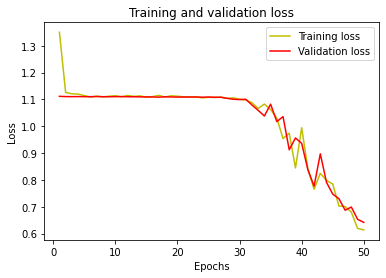

In [31]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

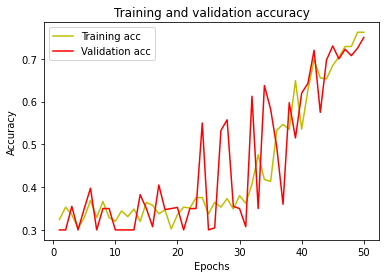

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

(1, 224, 224, 32)


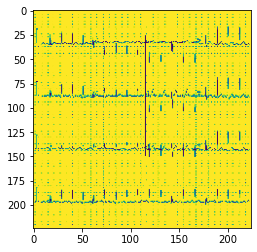

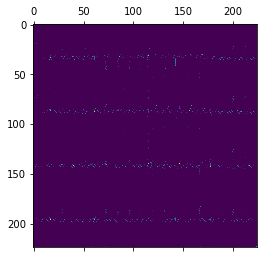

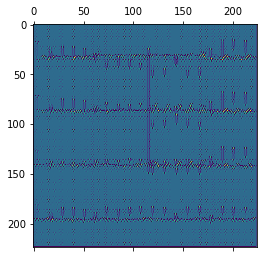

In [111]:
img = x_test[9]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0)

layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs = model.input, outputs = layer_outputs)
activations = activation_model.predict(input_img)

first_layer_activation = activations[0]
print(first_layer_activation.shape)
plt.matshow(first_layer_activation[0, :, :, 6], cmap ='viridis') 
plt.matshow(first_layer_activation[0, :, :, 15], cmap ='viridis')

In [33]:
x_test=test_images

The prediction for this image is:  ['HB']
The actual label for this image is:  HB


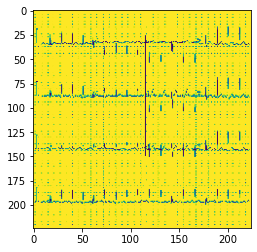

In [36]:
img = x_test[9]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0)
prediction = np.argmax(cnn_model.predict(input_img)) 
prediction = le.inverse_transform([prediction])
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", test_labels[9])

In [37]:
train_features = feature_extractor.predict(x_train)
valid_features = feature_extractor.predict(x_valid)
test_features = feature_extractor.predict(x_test)

In [38]:
import pandas as pd
df_train=pd.DataFrame(train_features)
df_valid=pd.DataFrame(valid_features)

In [39]:
df_train['hr']= train_hr
df_valid['hr']= valid_hr

In [40]:
df_train['y']= y_train
df_valid['y']= y_valid

In [41]:
data_set = pd.concat([df_train, df_valid], ignore_index = True)
data_set.reset_index()

,index,0,1,2,3,4,5,6,7,8,...,25080,25081,25082,25083,25084,25085,25086,25087,hr,y
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.012813,0.025483,0.0,...,0.022127,0.0,0.0,0.024879,0.0,0.004999,0.001636,0.0,86,0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.012813,0.026295,0.0,...,0.015951,0.0,0.0,0.024879,0.0,0.002994,0.000842,0.0,71,2
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.012813,0.026383,0.0,...,0.015951,0.0,0.0,0.024842,0.0,0.002994,0.000000,0.0,100,0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.012841,0.030815,0.0,...,0.022270,0.0,0.0,0.024879,0.0,0.004064,0.003585,0.0,70,2
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.012813,0.026135,0.0,...,0.015956,0.0,0.0,0.024980,0.0,0.003009,0.001196,0.0,86,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,845,0.0,0.0,0.0,0.0,0.0,0.0,0.012813,0.026968,0.0,...,0.023097,0.0,0.0,0.024879,0.0,0.005182,0.002809,0.0,71,2
846,846,0.0,0.0,0.0,0.0,0.0,0.0,0.012813,0.025298,0.0,...,0.015882,0.0,0.0,0.025341,0.0,0.002905,0.000000,0.0,116,0
847,847,0.0,0.0,0.0,0.0,0.0,0.0,0.012813,0.027379,0.0,...,0.012296,0.0,0.0,0.025741,0.0,0.004734,0.000000,0.0,85,1
848,848,0.0,0.0,0.0,0.0,0.0,0.0,0.012820,0.035329,0.0,...,0.019774,0.0,0.0,0.024879,0.0,0.004507,0.004535,0.0,66,2


In [42]:
inputs = data_set.iloc[: , :-1]
inputs

,0,1,2,3,4,5,6,7,8,9,...,25079,25080,25081,25082,25083,25084,25085,25086,25087,hr
0,0.0,0.0,0.0,0.0,0.0,0.0,0.012813,0.025483,0.0,0.0,...,0.000000,0.022127,0.0,0.0,0.024879,0.0,0.004999,0.001636,0.0,86
1,0.0,0.0,0.0,0.0,0.0,0.0,0.012813,0.026295,0.0,0.0,...,0.000000,0.015951,0.0,0.0,0.024879,0.0,0.002994,0.000842,0.0,71
2,0.0,0.0,0.0,0.0,0.0,0.0,0.012813,0.026383,0.0,0.0,...,0.000000,0.015951,0.0,0.0,0.024842,0.0,0.002994,0.000000,0.0,100
3,0.0,0.0,0.0,0.0,0.0,0.0,0.012841,0.030815,0.0,0.0,...,0.000000,0.022270,0.0,0.0,0.024879,0.0,0.004064,0.003585,0.0,70
4,0.0,0.0,0.0,0.0,0.0,0.0,0.012813,0.026135,0.0,0.0,...,0.000000,0.015956,0.0,0.0,0.024980,0.0,0.003009,0.001196,0.0,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,0.0,0.0,0.0,0.0,0.0,0.0,0.012813,0.026968,0.0,0.0,...,0.000000,0.023097,0.0,0.0,0.024879,0.0,0.005182,0.002809,0.0,71
846,0.0,0.0,0.0,0.0,0.0,0.0,0.012813,0.025298,0.0,0.0,...,0.000000,0.015882,0.0,0.0,0.025341,0.0,0.002905,0.000000,0.0,116
847,0.0,0.0,0.0,0.0,0.0,0.0,0.012813,0.027379,0.0,0.0,...,0.028501,0.012296,0.0,0.0,0.025741,0.0,0.004734,0.000000,0.0,85
848,0.0,0.0,0.0,0.0,0.0,0.0,0.012820,0.035329,0.0,0.0,...,0.000000,0.019774,0.0,0.0,0.024879,0.0,0.004507,0.004535,0.0,66


In [43]:
outputs = data_set.iloc[:, -1]
len(outputs)

850

In [44]:
training_inputs = inputs[:600]
training_outputs = outputs[:600]
testing_inputs = inputs[250:]
testing_outputs = outputs[250:]

In [45]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators=1,random_state=10)
RF_model.fit(training_inputs, training_outputs)
prediction_RF = RF_model.predict(testing_inputs)
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(testing_outputs, prediction_RF))

Accuracy =  0.915


In [121]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(max_iter=100,activation = 'relu',solver='sgd')
classifier.fit(training_inputs, training_outputs)
prediction_MLP = classifier.predict(testing_inputs)
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(testing_outputs, prediction_MLP))

Accuracy =  0.75


C:\Users\tejas\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [49]:
from sklearn.ensemble import GradientBoostingClassifier
nb = GradientBoostingClassifier()
nb.fit(training_inputs, training_outputs)
predictionsGNB=nb.predict(testing_inputs)
from sklearn.metrics import accuracy_score
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(testing_outputs, predictionsGNB))

Accuracy =  0.9883333333333333


53
(1, 224, 224)


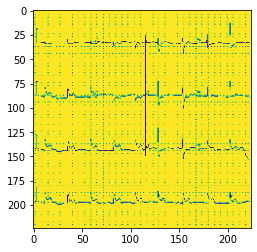

The prediction for this image is:  ['MI']
[1]


In [104]:
image = cv2.imread(r"C:\Users\tejas\Data\CNN_COV\test\MI\MI (2).jpg")
rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
hr=rgb[1530:1560,550:608]
text=tess.image_to_string(hr, lang='eng',config='--psm 13 --oem 3 -c tessedit_char_whitelist=0123456789')
heart_rate=int(text)
print(heart_rate)
img = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY) 
ret, thresh1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY + 
                                            cv2.THRESH_OTSU)   
I=thresh1
im=I[275:1520, 75:2135]
train_images=np.array(cnn)
plt.imshow(cnn)

cnn = cv2.resize(im, (224, 224))
img_tensor = np.array(cnn)
img_tensor = np.expand_dims(img_tensor, axis = 0)
img_tensor = img_tensor / 255.

print(img_tensor.shape)

plt.imshow(img_tensor[0])
plt.show()
prediction = np.argmax(cnn_model.predict(img_tensor)) 
prediction = le.inverse_transform([prediction])
print("The prediction for this image is: ", prediction)


img_features = feature_extractor.predict(img_tensor)
df_te=pd.DataFrame(img_features)
df_te['hr']= heart_rate
df_te
prediRF = RF_model.predict(df_te)
print(prediRF)

#img_features


0
The prediction for this image is:  ['HB']
The actual label for this image is:  HB


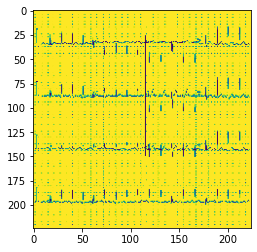

In [107]:
img = x_test[9]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0)
prediction = np.argmax(cnn_model.predict(input_img))
print(prediction)
prediction = le.inverse_transform([prediction])
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", test_labels[9])